In [1]:
%matplotlib inline
# => changed here to get the 3d feature
#%matplotlib notebook

import numpy as np 
from load_mock import load_penultimate_best_fit_mock
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mymap = plt.get_cmap("jet")


TO DO LIST
- get halo ages
- compute sigma_log10(Mhalo)

Load UM data

In [2]:
#  Select which data you wish to be loaded into memory
galprops = list(('sm', 'sfr', 'obs_sm', 'obs_sfr', 'icl', 'mvir',
                 'halo_id', 'upid', 'mpeak', 
                 'icl_history_main_prog', 'sm_history_main_prog', 'mpeak_history_main_prog'))

#  Define the directory where you unpacked the tarball storing the mock
root_dirname = "/Users/alexie/Work/HSC/UniverseMachine/Data"

#  Select which subvolumes you want to load
#  Here we will just choose all 144 subvolumes to load the whole mock

subvolumes=np.arange(144)

mock = load_penultimate_best_fit_mock(galprops=galprops, 
                                      root_dirname=root_dirname,
                                     subvolumes=subvolumes)

Total runtime = 18.06 seconds


Look at M100 / ICL / Mhalo 3D

In [3]:
#red_sequence_mask = mock['obs_ssfr'] < 10**-11
#red_sequence = mock[red_sequence_mask]

# ??? this versus using np.where?

# Make a cut on halo mass here, not galaxy mass!
high_mass_cent_mask = ((np.log10(mock['mvir']) > 12.0) & (mock['upid']==-1))
high_mass_cent = mock[high_mass_cent_mask]

sm_log = np.log10(high_mass_cent['sm'])
icl_log = np.log10(high_mass_cent['icl'])
sm_tot_log = np.log10(high_mass_cent['sm']+high_mass_cent['icl'])
sm_tot = high_mass_cent['sm']+high_mass_cent['icl']
mvir_log = np.log10(high_mass_cent['mvir'])

#icl_log = np.log10(mock['icl'])
#sm_tot_log = np.log10(mock['sm']+mock['icl'])
#mvir_log = np.log10(mock['mvir'])

# High mass central galaxies
#mask = np.where((sm_log>11.2) & (mock['upid']==-1))

#sm_log = sm_log[mask]
#mvir_log = mvir_log[mask]
#icl_log = icl_log[mask]
#sm_tot_log = sm_tot_log[mask] 
#print(len(sm_log))


Figure that I made with lensing and MBII

(11.5, 13.0)

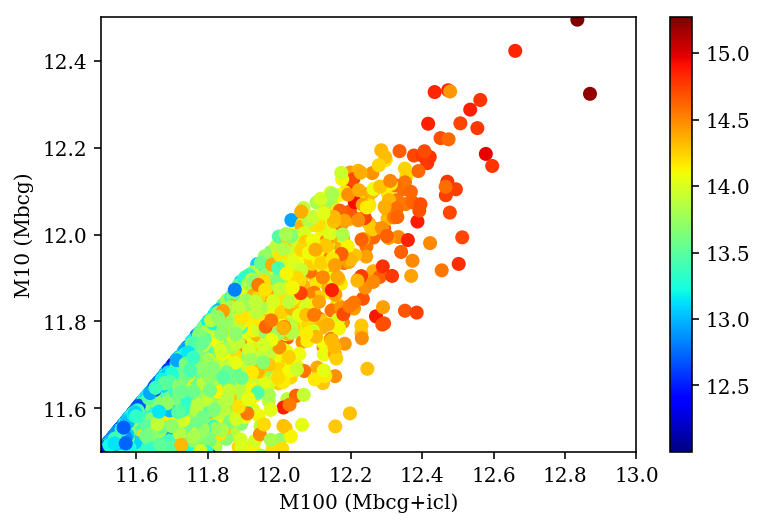

In [4]:
plt.scatter(sm_tot_log,sm_log,c=mvir_log,cmap=mymap)
plt.colorbar()

# ?? How to add name
#c = colorbar(___)
#c.set_label('bla')
plt.xlabel('M100 (Mbcg+icl)') 
plt.ylabel('M10 (Mbcg)')
plt.ylim(11.5,12.5)
plt.xlim(11.5,13.0)

Stellar masses here too large compared to data? Songs SMF drop sharply at 12.2

(11.2, 12.5)

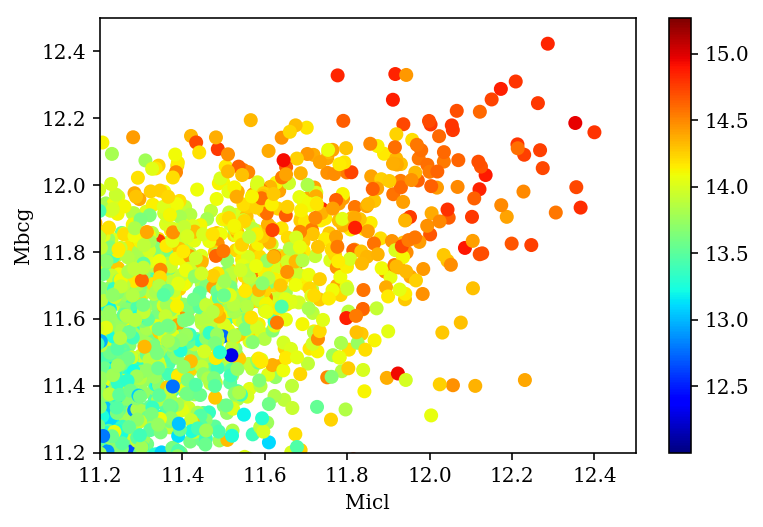

In [5]:
plt.scatter(icl_log,sm_log,c=mvir_log,cmap=mymap)
plt.colorbar()

plt.xlabel('Micl') 
plt.ylabel('Mbcg')
plt.ylim(11.2,12.5)
plt.xlim(11.2,12.5)

If no ICL went into the BCG, then the gradient here would be pure horizontal. There is some slope. Some merging gets deposited into the BCG.

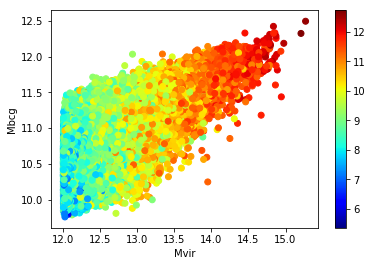

In [178]:
#plt.figure()
#plt.xlabel('Mhalo')
#plt.ylabel('ms')   
#plt.plot(mvir_log, sm_log, ',')

mymap = plt.get_cmap("jet")

plt.scatter(mvir_log,sm_log,c=icl_log,cmap=mymap)
plt.colorbar()

# ?? How to add name
#c = colorbar(___)
#c.set_label('bla')
plt.xlabel('Mvir') 
plt.ylabel('Mbcg')

A large scatter between Mbcg and Mhalo
The ICL colors are vertical, meaning that the ICL has a lot of information about halo mass at fixed M*_bcg.
I think the fact that the colors are vertical here means that in this model, Mbcg itself does not grow much via merging ("no ICL in BCG".). But isn't quite vertical exactly.

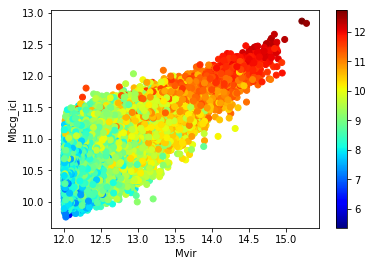

In [215]:
plt.scatter(mvir_log,sm_tot_log,c=icl_log,cmap=mymap)
plt.colorbar()

plt.xlabel('Mvir') 
plt.ylabel('Mbcg_icl')

Compute total M* in halo

In [ ]:
Same but now we are looking at M_total. We see the gradient appear. 

In [182]:
# Compute total mass in satellites
# Also compute mass of second most massive satellite

total_halo_sm_sats = np.empty_like(sm_log)
total_halo_sm = np.empty_like(sm_log)
second_mm = np.empty_like(sm_log)
stellar_mass_gap_bcg = np.empty_like(sm_log)
stellar_mass_gap_tot = np.empty_like(sm_log)

# ???? Does this modify sm_log ????
#total_halo_sm = sm_log

halo_id = high_mass_cent['halo_id']

# Go through and find all the satellites
# Not that many satellites? hum ...surprisingly low
        
# better way to do this
# Can use halo tools

#for i in range(0, 50):
for i in range(len(total_halo_sm)):
    this_halo_id=halo_id[i]
    sat_mask = (mock['upid']==this_halo_id)
    sat=mock[sat_mask]
        
    if len(sat['sm'])>0:
    
        sat=mock[sat_mask]
        #print(len(sat['sm']))
        #print(sm_log[i])
        #print(mvir_log[i]) 
    
        # Sum of M*
        sats_plus_icl = np.sum(sat['sm'])+np.sum(sat['icl'])
        
        total_halo_sm_sats[i] = np.log10(sats_plus_icl)
        total_halo_sm[i] = np.log10(sats_plus_icl+sm_tot[i])  # add the central as well
        #print(total_halo_sm_sats[i])
        
        # Most massive satellite
        second_mm[i] = np.log10(max(sat['sm']+sat['icl']))
         
    else:
        total_halo_sm_sats[i]=0.0
        total_halo_sm[i] = np.log10(sm_tot[i]) 
        second_mm[i] = 8 # something small
        
        #print(total_halo_sm_sats[i])
    
# Stellar mass gap in log    
stellar_mass_gap_bcg = sm_log - second_mm
stellar_mass_gap_tot = sm_tot_log - second_mm

print('done')
    

done


Stellar Mass Gap

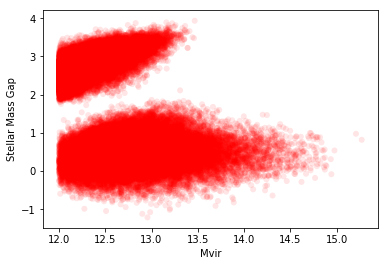

In [193]:
plt.scatter(mvir_log,stellar_mass_gap_tot,c='r',edgecolors='none',alpha=0.1)
plt.xlabel('Mvir') 
plt.ylabel('Stellar Mass Gap')

Hum. A lot of things for which most massive is not central in this mock .... 

In [194]:
# Hard to rotate ....
# Chan
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(sm_log, icl_log, mvir_log, c='r', marker='o')

#ax.set_xlabel('BCG M*')
#ax.set_ylabel('ICL')
#ax.set_zlabel('Mvir')

#plt.show()

[ 12.1  12.3  12.5  12.7  12.9  13.1  13.3  13.5  13.7  13.9  14.1  14.3]
[ 0.25297793  0.25347386  0.25763175  0.26121553  0.26557516  0.25977921
  0.25889764  0.23513763  0.23484854  0.23292509  0.20142535  0.22474929]


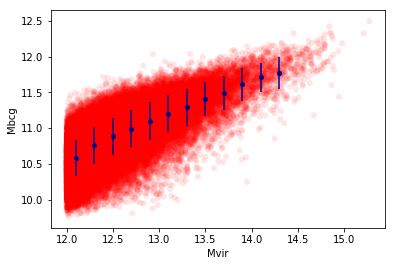

In [211]:
plt.scatter(mvir_log,sm_log,c='r',edgecolors='none',alpha=0.1)
plt.xlabel('Mvir') 
plt.ylabel('Mbcg')

mhalo_bin=np.arange(12,14.5,0.2)
x = np.arange(12.1,14.4,0.2)
y = np.arange(12.1,14.4,0.2)
err = np.arange(12.1,14.4,0.2)

for i in range(len(smm)):
    mask=np.where((mvir_log>mhalo_bin[i]) & (mvir_log<mhalo_bin[i+1]))
    y[i] = np.mean(sm_log[mask])
    err[i] = np.std(sm_log[mask])

plt.errorbar(x, y, yerr = err, fmt = '.', marker = 'o', ms = 4.0, color = 'darkblue', label = 'Data')

print(x)
print(err)

[ 12.1  12.3  12.5  12.7  12.9  13.1  13.3  13.5  13.7  13.9  14.1  14.3]
[ 0.25138189  0.25062423  0.25093038  0.24917508  0.24745688  0.23456043
  0.22894923  0.21055647  0.20554007  0.19490985  0.17855429  0.19502221]


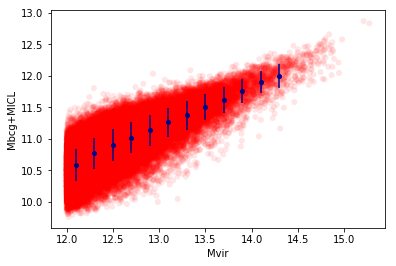

In [212]:
mymap = plt.get_cmap("jet")

plt.scatter(mvir_log,sm_tot_log,c='r',edgecolors='none',alpha=0.1)
plt.xlabel('Mvir') 
plt.ylabel('Mbcg+MICL')

mhalo_bin=np.arange(12,14.5,0.2)
x = np.arange(12.1,14.4,0.2)
y = np.arange(12.1,14.4,0.2)
err = np.arange(12.1,14.4,0.2)

for i in range(len(smm)):
    mask=np.where((mvir_log>mhalo_bin[i]) & (mvir_log<mhalo_bin[i+1]))
    y[i] = np.mean(sm_tot_log[mask])
    err[i] = np.std(sm_tot_log[mask])

plt.errorbar(x, y, yerr = err, fmt = '.', marker = 'o', ms = 4.0, color = 'darkblue', label = 'Data')

print(x)
print(err)


Scatter gets smaller when going from Mbcg to Mbcg + ICl xxx Quanotyf here xxxxx

[ 12.1  12.3  12.5  12.7  12.9  13.1  13.3  13.5  13.7  13.9  14.1  14.3]
[ 0.24276193  0.22953123  0.22359288  0.2188607   0.20378171  0.1855996
  0.15888117  0.140051    0.1189453   0.10507755  0.09246775  0.08532818]


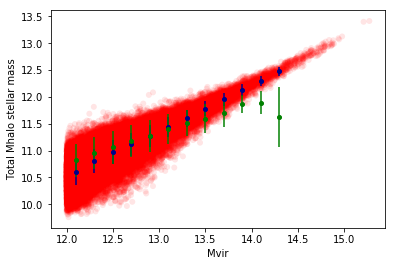

In [225]:
# Looking at scater in total M* per halo

sat_mask = ((np.log10(mock['mvir']) > 12.0) & (mock['upid']>0))
sat_cat = mock[sat_mask]
mvir_log_sats = np.log10(sat_cat['mvir'])
sm_tot_sats_log = np.log10(sat_cat['sm']+sat_cat['icl'])

plt.scatter(mvir_log,total_halo_sm,c='r',edgecolors='none',alpha=0.1)
plt.xlabel('Mvir') 
plt.ylabel('Total Mhalo stellar mass')

mhalo_bin=np.arange(12,14.5,0.2)
x = np.arange(12.1,14.4,0.2)
y = np.arange(12.1,14.4,0.2)
err = np.arange(12.1,14.4,0.2)

# Looking at satellites
y_sat = np.arange(12.1,14.4,0.2)
err_sat = np.arange(12.1,14.4,0.2)

sm_tot_log = np.log10(high_mass_cent['sm']+high_mass_cent['icl'])
for i in range(len(smm)):
    mask=np.where((mvir_log>mhalo_bin[i]) & (mvir_log<mhalo_bin[i+1]))
    y[i] = np.mean(total_halo_sm[mask])
    err[i] = np.std(total_halo_sm[mask])

    mask=np.where((mvir_log_sats>mhalo_bin[i]) & (mvir_log_sats<mhalo_bin[i+1]))
    y_sat[i] = np.mean(sm_tot_sats_log[mask])
    err_sat[i] = np.std(sm_tot_sats_log[mask])
    
plt.errorbar(x, y, yerr = err, fmt = '.', marker = 'o', ms = 4.0, color = 'darkblue', label = 'Cen')
plt.errorbar(x, y_sat, yerr = err_sat, fmt = '.', marker = 'o', ms = 4.0, color = 'green', label = 'Sat')

print(x)
print(err)

Scatter gets REALLY small when looking at M* in the halo. In the future would be interested to see what drives the scatter in THIS relation. Does the scatter go down for different Mhalo definitions?

[ 12.1  12.3  12.5  12.7  12.9  13.1  13.3  13.5  13.7  13.9  14.1  14.3]
[ 0.24276193  0.22953123  0.22359288  0.2188607   0.20378171  0.1855996
  0.15888117  0.140051    0.1189453   0.10507755  0.09246775  0.08532818]


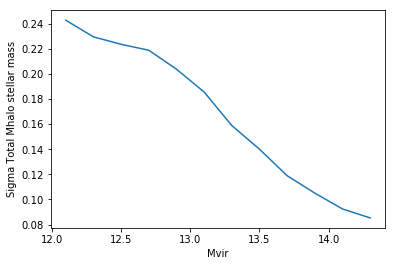

In [219]:
# functional form for scatter in M*_total versus Mhalo
mhalo_bin=np.arange(12,14.5,0.2)
x = np.arange(12.1,14.4,0.2)
y = np.arange(12.1,14.4,0.2)
err = np.arange(12.1,14.4,0.2)

for i in range(len(smm)):
    mask=np.where((mvir_log>mhalo_bin[i]) & (mvir_log<mhalo_bin[i+1]))
    y[i] = np.mean(total_halo_sm[mask])
    err[i] = np.std(total_halo_sm[mask])

plt.plot(x, err)
plt.xlabel('Mvir') 
plt.ylabel('Sigma Total Mhalo stellar mass')

print(x)
print(err)

[ 12.1  12.3  12.5  12.7  12.9  13.1  13.3  13.5  13.7  13.9  14.1  14.3]
[ 0.24202032  0.22924888  0.22354377  0.21855523  0.20348967  0.18563081
  0.1619776   0.14517845  0.13302725  0.12908411  0.11455542  0.11813529]


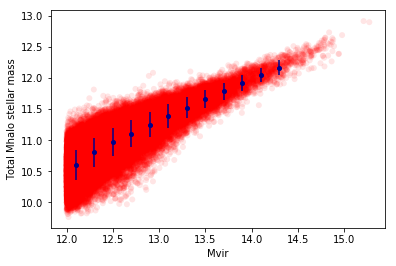

In [213]:
# What does the scatter look like when you add the two most massive galaxies together?
bcg_plus_second = np.log10(pow(10,second_mm)+pow(10,sm_tot_log))

plt.scatter(mvir_log,bcg_plus_second,c='r',edgecolors='none',alpha=0.1)
plt.xlabel('Mvir') 
plt.ylabel('Total Mhalo stellar mass')

mhalo_bin=np.arange(12,14.5,0.2)
x = np.arange(12.1,14.4,0.2)
y = np.arange(12.1,14.4,0.2)
err = np.arange(12.1,14.4,0.2)

for i in range(len(smm)):
    mask=np.where((mvir_log>mhalo_bin[i]) & (mvir_log<mhalo_bin[i+1]))
    y[i] = np.mean(bcg_plus_second[mask])
    err[i] = np.std(bcg_plus_second[mask])

plt.errorbar(x, y, yerr = err, fmt = '.', marker = 'o', ms = 4.0, color = 'darkblue', label = 'Data')

print(x)
print(err)

Wow, scatter goes down just by adding together the BCG and the second most massive satellite! That second most massive galaxy has a big impact.

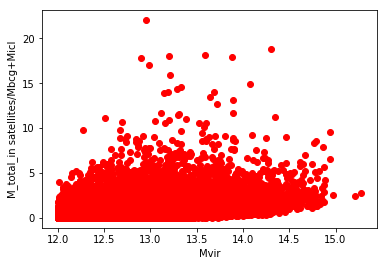

In [199]:
ratio = pow(10.0,total_halo_sm_sats-sm_tot_log)
plt.scatter(mvir_log,ratio,c='r')
plt.xlabel('Mvir') 
plt.ylabel('M_total_in satellites/Mbcg+Micl')

There is about 4 times more mass locked up in satellites compared to the central plus ICL

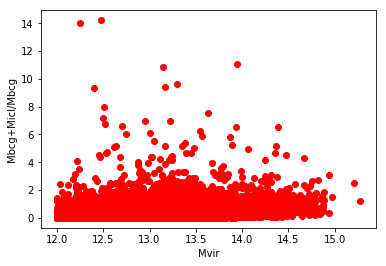

In [200]:
ratio = pow(10.0,icl_log-sm_log)
plt.scatter(mvir_log,ratio,c='r')
plt.xlabel('Mvir') 
plt.ylabel('Mbcg+Micl/Mbcg')

There is about an equal amount of mass in the ICL

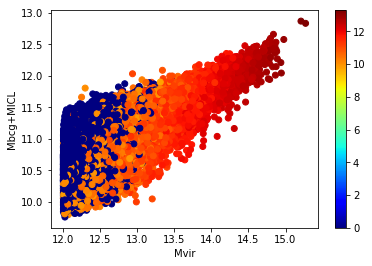

In [191]:
mymap = plt.get_cmap("jet")

plt.scatter(mvir_log,sm_tot_log,c=total_halo_sm_sats,cmap=mymap)
plt.colorbar()
plt.xlabel('Mvir') 
plt.ylabel('Mbcg+MICL')

Amount of mass in satellites accounts for part of the scatter in M* - Mhalo

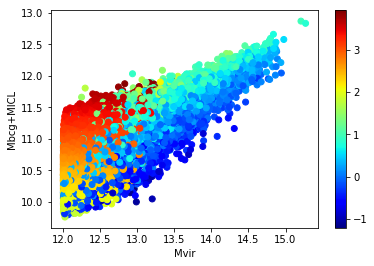

In [192]:
mymap = plt.get_cmap("jet")

plt.scatter(mvir_log,sm_tot_log,c=stellar_mass_gap_tot,cmap=mymap)
plt.colorbar()
plt.xlabel('Mvir') 
plt.ylabel('Mbcg+MICL')

Scatter in M* versus Mhalo also corrlates with stellar mass gap. Central galaxies with smaller M* at fixed Mhalo have smaller values of M* gap.

In [ ]:
plt.scatter(sm_log,icl_log,c=total_halo_sm_sats,cmap=mymap)
plt.colorbar()
plt.xlabel('MBCG') 
plt.ylabel('MICL')